In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer
import joblib

# Loading dataset
gold_data = pd.read_csv('gld_price_data.csv')
# print first 5 rows
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [2]:
# number of rows and columns
gold_data.shape
# basic informations about the data
gold_data.info()
# checking the number of missing values
gold_data.isnull().sum()
# getting the statistical measures of the data

gold_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


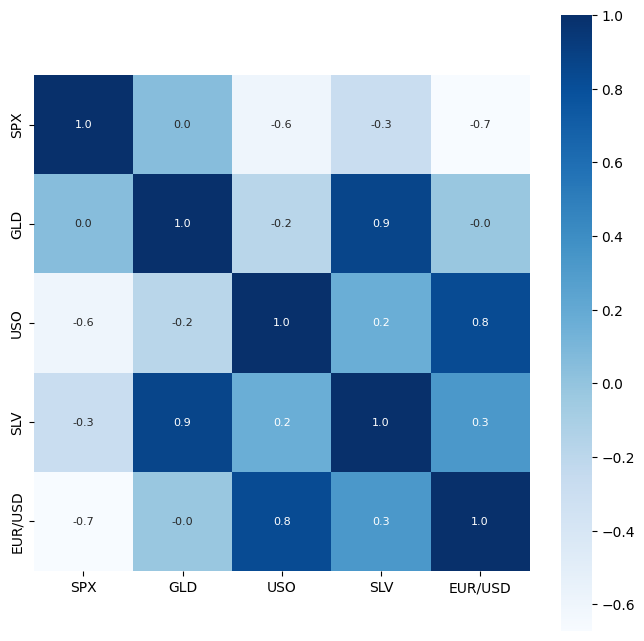

In [3]:
# Data Preprocessing
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extracting date features (Year, Month, Day) from the 'Date' column
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day

# Impute missing values
imputer = SimpleImputer(strategy='mean')
gold_data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']] = imputer.fit_transform(gold_data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']])
gold_data.head()
# Visualizing correlation Matrix Distribution
correlation = gold_data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']].corr()


# Correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()



In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


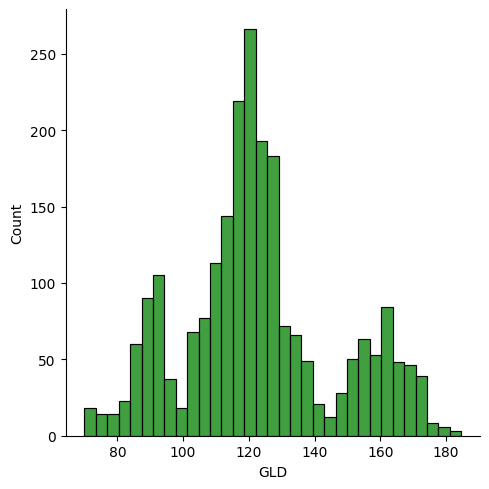

In [5]:

# correlation values of GLD
print(correlation['GLD'])
# Distribution plot for 'GLD'
sns.displot(gold_data['GLD'], color='green')
plt.show()


In [6]:
# Splitting the data into features (X) and target (Y)
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']
print(X)
print(Y)
# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


              SPX        USO      SLV   EUR/USD  Year  Month  Day
0     1447.160034  78.470001  15.1800  1.471692  2008      1    2
1     1447.160034  78.370003  15.2850  1.474491  2008      1    3
2     1411.630005  77.309998  15.1670  1.475492  2008      1    4
3     1416.180054  75.500000  15.0530  1.468299  2008      1    7
4     1390.189941  76.059998  15.5900  1.557099  2008      1    8
...           ...        ...      ...       ...   ...    ...  ...
2285  2671.919922  14.060000  15.5100  1.186789  2018      5    8
2286  2697.790039  14.370000  15.5300  1.184722  2018      5    9
2287  2723.070068  14.410000  15.7400  1.191753  2018      5   10
2288  2730.129883  14.380000  15.5600  1.193118  2018      5   14
2289  2725.780029  14.405800  15.4542  1.182033  2018      5   16

[2290 rows x 7 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.

R squared error :  0.9951001046029136


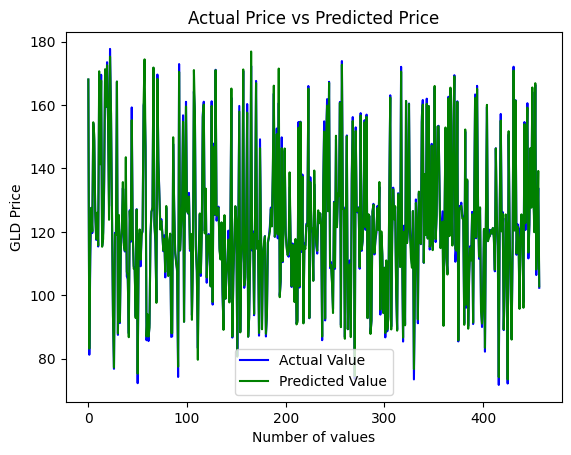

In [7]:
# Using Random forest regressor on dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, Y_train)

# Prediction on Test Data
Y_pred = regressor.predict(X_test)

# R squared error
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared error : ", error_score)
# Plotting actualprice vs predicted price
plt.plot(Y_test.values, color='blue', label='Actual Value')
plt.plot(Y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()


In [8]:
# Testing the Model using X_Train dataset
new_data = pd.DataFrame({
    'SPX': [1278.04],
    'USO': [36.85],
    'SLV': [28.01],
    'EUR/USD': [1.30],
    'Year': [2012],
    'Month': [1],
    'Day': [3]
}, columns=X_train.columns)

predicted_gld_value = regressor.predict(new_data)

print(f"Predicted GLD value for 2012-01-03: {predicted_gld_value[0]}")
# Saving the model for future use
joblib.dump(regressor, 'gold_price_model.pkl')
print("Model saved as 'gold_price_model.pkl'")


Predicted GLD value for 2012-01-03: 153.87530100999996
Model saved as 'gold_price_model.pkl'


In [9]:
pip install gradio 


Note: you may need to restart the kernel to use updated packages.


In [10]:
import gradio as gr
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeRegressor

# Loading my Decision Tree model
decision_tree_model = joblib.load('gold_price_model.pkl')

def predict_gld_price(spx, uso, slv, eurusd, year, month, day):
  """Predicts the GLD price based on input features."""
  new_data = pd.DataFrame({
      'SPX': [spx],
      'USO': [uso],
      'SLV': [slv],
      'EUR/USD': [eurusd],
      'Year': [year],
      'Month': [month],
      'Day': [day]
  })
  predicted_gld_value = decision_tree_model.predict(new_data)[0]
  return predicted_gld_value

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_gld_price,
    inputs=[
        gr.Number(label="SPX"),
        gr.Number(label="USO"),
        gr.Number(label="SLV"),
        gr.Number(label="EUR/USD"),
        gr.Number(label="Year"),
        gr.Number(label="Month"),
        gr.Number(label="Day")
    ],
    outputs=gr.Number(label="Predicted GLD Price"),
    title="Gold Price Prediction",
    description="Enter the features to predict the GLD price."
)

# Launch the interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
